<a href="https://colab.research.google.com/github/NguyenKhanhThoLoc/Test_file/blob/main/Image_Caption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time
from numpy import array
import os

In [2]:
BASE_DIR = r"C:\\Users\ThoLoc\Desktop\Code\ImageCaptioning\train"
WORKING_DIR = r"C:\\Users\ThoLoc\Desktop\Code\ImageCaptioning\train\working"

In [3]:
#load caption data
df = pd.read_csv(BASE_DIR + "\captions.txt")
df

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [4]:
train, val = np.split(df.sample( frac=1,random_state=42), [int(.8*len(df)),])
print(len(df), train.shape, val.shape)
# chia tập dữ liệu train khoảng 80%, val khoảng 20%

40455 (32364, 2) (8091, 2)


c:\Users\ThoLoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [5]:
image_path = r'C:\\Users\ThoLoc\Desktop\Code\ImageCaptioning\train\Images'

75    a black and white dog jumping in the air to ge...
76    A black and white dog jumps up towards a yello...
77             A dog leaps to catch a ball in a field .
78    A white dog is trying to catch a ball in midai...
79    The white dog is playing in a green field with...
Name: caption, dtype: object


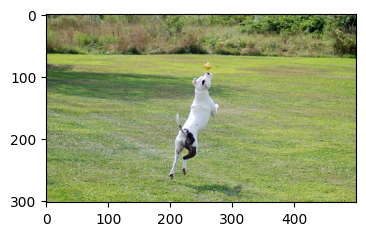

In [6]:
# hiển thị thử 1 dữ liệu
n = 15
imagecaption = df['image'][5*n]
link_image = "\\" + imagecaption
img = Image.open(image_path + link_image)
plt.figure(figsize=(4, 4))
plt.imshow(img)
print(df['caption'][5*n:5*n+5])

In [7]:
print(df['caption'][5*n:5*n+6])
#khi in cái này ra thì sẽ thấy 1 dòng caption khác

75    a black and white dog jumping in the air to ge...
76    A black and white dog jumps up towards a yello...
77             A dog leaps to catch a ball in a field .
78    A white dog is trying to catch a ball in midai...
79    The white dog is playing in a green field with...
80    A child and a woman are at waters edge in a bi...
Name: caption, dtype: object


** Preprocessing captions**

In [8]:
import re
def caption_preprocessing(text, remove_digits=True):
  pattern=r'[^a-zA-z0-9\s]'
  text=re.sub(pattern,'',text)
  # thay thế tất các ký tự không có nằm trong pattern trên, hay là loại bỏ
  # các ký tự không cần thiết như dấu câu bằng khoảng trắng.
  text=text.split()
  # chuyển thành chữ thường hết
  text = [word.lower() for word in text]
  # loại bỏ ký tự 's' và 'a'
  # text = [word for word in text if len(word)>1]

  # remove tokens with numbers in them
  text = [word for word in text if word.isalpha()]
  # store as string
  text =  ' '.join(text)

  # insert 'startseq', 'endseq' cho chuỗi
  text = 'startseq ' + text + ' endseq'
  return text

print(caption_preprocessing('chao .. ban $ hello980 78we it\'s a table.#'))


startseq chao ban its a table endseq


In [9]:
# xử lý với các caption
df['caption'] = df['caption'].apply(caption_preprocessing)
df['caption']

0        startseq a child in a pink dress is climbing u...
1        startseq a girl going into a wooden building e...
2        startseq a little girl climbing into a wooden ...
3        startseq a little girl climbing the stairs to ...
4        startseq a little girl in a pink dress going i...
                               ...                        
40450    startseq a man in a pink shirt climbs a rock f...
40451    startseq a man is rock climbing high in the ai...
40452    startseq a person in a red shirt climbing up a...
40453        startseq a rock climber in a red shirt endseq
40454    startseq a rock climber practices on a rock cl...
Name: caption, Length: 40455, dtype: object

In [10]:
# đếm số từ trong dataset và độ dài lớn nhất của caption
word_counts = {}
max_length = 0
for text in df['caption']:
  words = text.split()
  max_length = len(words) if (max_length < len(words)) else max_length
  for w in words:
    try:
      word_counts[w] +=1
    except:
        word_counts[w] = 1
print(len(word_counts))
print(max_length)

8777
37


In [11]:
# Chỉ lấy các từ xuất hiện trên 15 lần xem thế nào
word_count_threshold = 15
vocab = [w for w in word_counts if word_counts[w] >= word_count_threshold]
print('preprocessed words %d -> %d' % (len(word_counts), len(vocab)))


preprocessed words 8777 -> 1556


In [12]:
i2w = {}
w2i = {}

id = 1
for w in vocab:
    w2i[w] = id
    i2w[id] = w
    id += 1

print(len(i2w), len(w2i))
print(i2w[300])
print(w2i["setting"])

# từ ra chỉ mục, và từ chỉ mục ra từ

1556 1556
them
295


**sử dụng Glove để embedding word**

In [14]:
glove_dir = r'C:\\Users\ThoLoc\Desktop\Code\ImageCaptioning\glove'
embeddings_index = {} # empty dictionary
file = open(glove_dir + '\glove.6B.200d.txt', encoding="utf-8")
count = 0
for line in file:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
  count += 1
  if count % 100000 == 0:
      print(f"Đã tải {count} từ")
file.close()
print('Found %s word vectors.' % len(embeddings_index))

Đã tải 100000 từ
Đã tải 200000 từ
Đã tải 300000 từ
Đã tải 400000 từ
Found 400000 word vectors.


In [15]:
embeddings_index['boy']

array([ 0.13328  , -0.063486 , -0.46471  , -0.51955  ,  0.079604 ,
       -0.1715   , -0.30575  ,  0.15448  ,  0.075202 , -0.44888  ,
        0.24231  ,  0.021223 ,  1.0471   ,  0.53607  ,  0.19587  ,
       -0.10826  , -0.40146  ,  0.031243 , -0.11277  ,  0.36173  ,
        0.71412  ,  2.1059   , -0.16003  ,  0.091236 , -0.26872  ,
       -0.60152  ,  0.19542  , -1.1688   , -0.32821  , -0.25996  ,
        0.056736 ,  0.1233   , -0.10844  ,  0.4492   ,  0.47993  ,
        0.039362 , -0.61086  ,  0.21564  , -0.56351  ,  0.016631 ,
       -0.65341  ,  0.32702  , -0.45518  ,  0.32215  , -0.387    ,
        0.21662  ,  0.76857  ,  0.41205  ,  0.12678  ,  0.59011  ,
        0.1943   , -0.07646  , -0.28204  , -0.45991  , -0.22153  ,
        0.012127 , -0.71267  ,  0.24982  , -0.038764 , -0.008747 ,
       -0.27897  , -0.73961  , -0.37944  ,  0.48481  , -0.21584  ,
       -0.77279  ,  0.32943  ,  0.21289  ,  0.46601  ,  0.16991  ,
        0.76738  , -0.30901  , -0.76706  ,  0.49542  , -0.6872

In [16]:
# Sở dĩ nó bỏ phần từ đầu tiên vì trong bộ dữ liệu phần từ là từ được biểu diễn

In [17]:
# từ boy có giá trị vecto như kia
embeddings_index['boy'].shape


(200,)

In [18]:
# thiết lập biến cho học máy
# embedding_dim đại diện cho số chiều của vectơ biểu diễn cho mỗi từ trong mô hình
# cái giá trị embedding_dim em không biết người ta chọn kiểu gì.
embedding_dim = 200
vocab_size = len(vocab) + 1 # thêm 1 padding
vocab_size

1557

In [19]:
# tạo vecto biểu diễn từ trong với chiều cao là số từ trong bộ từ vocab và
# chiều rộng là embedding_dim 200.
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in w2i.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)

(1557, 200)


In [20]:
from pickle import dump, load

In [21]:
# Lưu ý không được viết các folder tên có khoảng trống

In [22]:
with open(WORKING_DIR + "\embedding_matrix.pkl", "wb") as file:
    dump(embedding_matrix, file)

In [23]:
embedding_matrix = load(open(WORKING_DIR + "\embedding_matrix.pkl", "rb"))
embedding_matrix.shape

(1557, 200)

Sử dụng Inception V3

In [24]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
model = InceptionV3()

In [26]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, show_shapes=True, show_layer_names=True)

In [27]:
from tensorflow.keras.models import Model
# Tạo model mới, bỏ layer cuối từ inception v3
# layer cuối dùng để phân loại khá lớn nên tính toán mất nhiều thời gian mà không cần
model_new = Model(model.input, model.layers[-2].output)

In [28]:

model_new.input_shape

(None, 299, 299, 3)

In [29]:
model_new.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 21,768,352 (83.04 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [30]:
images = {}
captions = {}

start = time()
for i in range(len(df)):
   images[df['image'][i]] = np.array(Image.open(image_path +"\\"+ df['image'][i]))
   try:
    captions[df['image'][i]].append(df['caption'][i])
   except:
    captions[df['image'][i]] = [df['caption'][i]]

print(len(images), len(captions))
print('Time: ',time() - start)

8091 8091
Time:  158.47913002967834


In [31]:
with open(WORKING_DIR + "\encoded_captions.pkl", "wb") as file:
    dump(captions, file)

In [32]:
captions = load(open(WORKING_DIR + "\encoded_captions.pkl", "rb"))
len(captions)

8091

In [33]:
images[df['image'][1]].shape

(500, 375, 3)

In [34]:
images[df['image'][3]].shape

(500, 375, 3)

In [35]:
tmp = np.array([[0,2,1],[3,5,6]])
tmp = np.expand_dims(tmp, axis=0)
tmp

array([[[0, 2, 1],
        [3, 5, 6]]])

In [36]:
from keras.applications.inception_v3 import preprocess_input
# Image embedding thành vector (2048, )
def encode(image):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = np.resize(image, (299, 299, 3 ))
    # Add one more dimension
    img = np.expand_dims(img, axis=0)
    # preprocess the images using preprocess_input() from inception module
    img = preprocess_input(img)

    feature_vec = model_new.predict(img) # Get the encoding vector for the image
    feature_vec = np.reshape(feature_vec, feature_vec.shape[1]) # reshape from (1, 2048) to (2048, )
    return feature_vec

In [37]:
# Gọi hàm encode với các ảnh trong traning set
start = time()
encoding_image = {}
for id, img in images.items():
    encoding_image[id] = encode(img)

print("Time taken in seconds =", time()-start)

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [38]:
encoding_image['2089542487_b4c1ee7025.jpg'].shape

(2048,)

In [39]:
train_features = encoding_image

In [40]:
from pickle import dump, load
with open(WORKING_DIR + "\encoded_train_images.pkl", "wb") as file:
    dump(encoding_image, file)

In [41]:
train_features = load(open(WORKING_DIR + "\encoded_train_images.pkl", "rb"))
len(train_features)

8091

Training

In [42]:
model = "a"
#khởi tạo 1 model

In [43]:
import tensorflow

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

def data_generator(captions, images, w2i, max_length, batch_size):

  X_image, X_cap, y = [], [], []
  n = 0
  while 1:
    for id, caps in captions.items():
      n += 1
      image = images[id]
      for cap in caps:
        # encode the sequence
        seq = [w2i[word] for word in cap.split(' ') if word in w2i]

        for i in range(1, len(seq)):
          # split into input and output pair
          in_seq, out_seq = seq[:i], seq[i]

          # pad input sequence
          in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
          # encode output sequence
          out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]

          # store
          X_image.append(image)
          X_cap.append(in_seq)
          y.append(out_seq)
      if n == batch_size:
          X_image, X_cap, y = np.array(X_image), np.array(X_cap), np.array(y)
          yield (X_image, X_cap), y
          X_image, X_cap, y = [], [], []
          n = 0

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, TimeDistributed, Dense, RepeatVector,\
                         Activation, Flatten, Reshape, concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import add
from tensorflow.keras.applications.inception_v3 import InceptionV3

from tensorflow.keras import Input
from tensorflow.keras import optimizers

In [46]:
# Tạo model
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.5)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)


# max_length = 37, vocab_size = 1557, embedding_dim = 200
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, embedding_dim, mask_zero=True)(inputs2)
se2 = Dropout(0.5)(se1)
se3 = LSTM(256)(se2)

decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)

In [48]:
#from tensorflow.keras.utils import plot_model
#plot_model(model, show_shapes=True, show_layer_names=True)

In [49]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 37)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 37, 200)   │    311,400 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 37, 200)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 37)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    467,968 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense[0][0],      │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1557)      │    400,149 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,769,853 (6.75 MB)

 Trainable params: 1,769,853 (6.75 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Layer 2 dùng GLOVE Model nên set weight thẳng và không cần train
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [51]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [57]:
model.optimizer.lr = 0.0001
epochs = 1
batch_size = 16
steps = len(train_features)

In [58]:
checkpoint_path = WORKING_DIR + "\cp.weights.h5"

In [59]:
from tensorflow.keras.callbacks import ModelCheckpoint
cp_callback = ModelCheckpoint(filepath=checkpoint_path,save_best_only=False, save_weights_only=True, verbose=1)

In [60]:
generator = data_generator(captions=captions, images=train_features, w2i=w2i, max_length=max_length, batch_size=batch_size)
model.fit(generator, epochs=epochs, steps_per_epoch=steps, verbose=1, callbacks=[cp_callback])

8091/8091 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 2.7840
Epoch 1: saving model to C:\\Users\ThoLoc\Desktop\Code\ImageCaptioning\train\working\cp.weights.h5
8091/8091 ━━━━━━━━━━━━━━━━━━━━ 9496s 1s/step - loss: 2.7840


In [61]:
import h5py 

In [62]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 37)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 2048)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 37, 200)   │    311,400 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 2048)      │          0 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 37, 200)   │          0 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 37)        │          0 │ input_layer_2[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    524,544 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 256)       │    467,968 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense[0][0],      │
│                     │                   │            │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1557)      │    400,149 │ dense_1[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 4,686,761 (17.88 MB)

 Trainable params: 1,458,453 (5.56 MB)

 Non-trainable params: 311,400 (1.19 MB)

 Optimizer params: 2,916,908 (11.13 MB)

In [72]:
model.save(WORKING_DIR + '\model.keras')

In [64]:
model.save_weights(WORKING_DIR + '\model.weights.h5')

sử dụng mô hình

In [73]:
from tensorflow.keras.models import load_model
model_new = load_model(WORKING_DIR + '\model.keras')

c:\Users\ThoLoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:396: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 20 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [74]:

def greedySearch(photo):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = [w2i[w] for w in in_text.split() if w in w2i]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model_new.predict([photo,sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = i2w[yhat]
        in_text += ' ' + word
        if word == 'endseq':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

250    startseq a black and white dog is attempting t...
251    startseq a black and white dog jumps after a y...
252    startseq a black and white dog jumps to get th...
253    startseq a black dog is jumping up to catch a ...
254           startseq a dog jumps to catch a toy endseq
Name: caption, dtype: object


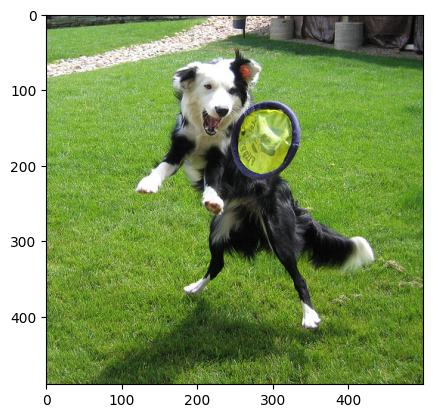

a brown dog is chasing a brown dog on the grass


In [77]:
pic = list(train_features.keys())[50]
image = train_features[pic].reshape((1,2048))
img = Image.open(image_path +"\\"+ pic)
print(df['caption'][df['image'] == pic])
plt.imshow(img)
plt.show()
predict = greedySearch(image)
print(predict)

In [78]:
!mkdir test

In [83]:
#Đánh giá model

In [79]:
TEST_DIR = r"C:\\Users\ThoLoc\Desktop\Code\ImageCaptioning\test"

In [108]:
#load caption data test
dftest = pd.read_csv(TEST_DIR + "\captions.txt")
dftest

,image,caption
0,3637013_c675de7705.jpg,A couple stands close at the water 's edge .
1,3637013_c675de7705.jpg,The two people stand by a body of water and in...
2,3637013_c675de7705.jpg,Two people hold each other near a pond .
3,3637013_c675de7705.jpg,Two people stand by the water .
4,3637013_c675de7705.jpg,Two people stand together on the edge of the w...
5,180094434_b0f244832d.jpg,A few younger boys play around a fountain .
6,180094434_b0f244832d.jpg,A group of people gather around a large founta...
7,180094434_b0f244832d.jpg,Three boys play around a fountain in an office...
8,180094434_b0f244832d.jpg,Three kids are playing at a fountain in front ...
9,180094434_b0f244832d.jpg,three kids playing around a fountain


In [109]:
image_test_path = r'C:\\Users\ThoLoc\Desktop\Code\ImageCaptioning\test\Images'

45    A snowboarder sits on a slope with skiers and ...
46     A snowboarder takes a rest on the mountainside .
47    Snowboarders sitting in the snow while skiers ...
48                    The snowboarder is sitting down .
49               Two skiers stand , two sit on slopes .
Name: caption, dtype: object


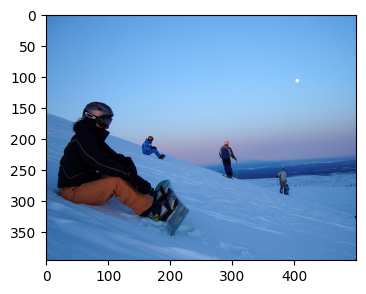

In [110]:
# hiển thị thử 1 dữ liệu
n = 9
imagecaption = dftest['image'][5*n]# tên image
link_image = "\\" + imagecaption
img = Image.open(image_test_path + link_image)
plt.figure(figsize=(4, 4))
plt.imshow(img)
print(dftest['caption'][5*n:5*n+5])

In [93]:
from tqdm.notebook import tqdm

In [118]:
import re
def caption_test_preprocessing(text, remove_digits=True):
  pattern=r'[^a-zA-z0-9\s]'
  text=re.sub(pattern,'',text)
  # thay thế tất các ký tự không có nằm trong pattern trên, hay là loại bỏ
  # các ký tự không cần thiết như dấu câu bằng khoảng trắng.
  text=text.split()
  # chuyển thành chữ thường hết
  text = [word.lower() for word in text]
  # loại bỏ ký tự 's' và 'a'
  # text = [word for word in text if len(word)>1]
  # remove tokens with numbers in them
  text = [word for word in text if word.isalpha()]
  # store as string
  text =  ' '.join(text)
  return text

print(caption_test_preprocessing('chao .. ban $ hello980 78we it\'s a table.#'))

chao ban its a table


In [119]:
# xử lý với các caption test
dftest['caption'] = dftest['caption'].apply(caption_test_preprocessing)
dftest['caption']

0             a couple stands close at the water s edge
1     the two people stand by a body of water and in...
2                two people hold each other near a pond
3                         two people stand by the water
4     two people stand together on the edge of the w...
5             a few younger boys play around a fountain
6      a group of people gather around a large fountain
7     three boys play around a fountain in an office...
8     three kids are playing at a fountain in front ...
9                  three kids playing around a fountain
10    a group of eight people are gathered around a ...
11        a group of people gathered around in the dark
12    a group of people sit around a table outside o...
13     a group of people sit outdoors together at night
14    a group of people sitting at a table in a dark...
15       a man holding onto ropes while boogie boarding
16    a man holds onto ropes and is pulled through t...
17      a man rides a wakeboard attached to a pa

In [133]:
images_test = {}
captions_test = {}

start = time()
for i in range(len(dftest)):
   images_test[dftest['image'][i]] = np.array(Image.open(image_test_path +"\\"+ dftest['image'][i]))
   try:
    captions_test[dftest['image'][i]].append(dftest['caption'][i])
   except:
    captions_test[dftest['image'][i]] = [dftest['caption'][i]]

print(len(images_test), len(captions_test))
print('Time: ',time() - start)

10 10
Time:  0.1800835132598877


In [134]:
model_test = InceptionV3()

In [135]:
model_test = Model(model_test.input, model_test.layers[-2].output)

In [136]:
from keras.applications.inception_v3 import preprocess_input
# Image embedding thành vector (2048, )
def encode_test(image):
    # Convert all the images to size 299x299 as expected by the inception v3 model
    img = np.resize(image, (299, 299, 3 ))
    # Add one more dimension
    img = np.expand_dims(img, axis=0)
    # preprocess the images using preprocess_input() from inception module
    img = preprocess_input(img)

    feature_vec = model_test.predict(img) # Get the encoding vector for the image
    feature_vec = np.reshape(feature_vec, feature_vec.shape[1]) # reshape from (1, 2048) to (2048, )
    return feature_vec

In [137]:
start = time()
encoding_image_test = {}
for id, img in images_test.items():
    encoding_image_test[id] = encode_test(img)

print("Time taken in seconds =", time()-start)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Time taken in seconds = 3.933791160583496


In [138]:
test_features = encoding_image_test

In [141]:
len(dftest)

50

In [142]:
#Bleu-score 
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for i in range(9):  
    # get actual caption
    captions = dftest['caption'][5*i:5*i+5]
    # predict the caption for image
    pic = list(test_features.keys())[i]
    image_test = test_features[pic].reshape(1,2048)
    y_pred = greedySearch(image_test) 
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)

In [143]:
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))

BLEU-1: 0.336538


c:\Users\ThoLoc\AppData\Local\Programs\Python\Python311\Lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [144]:
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

BLEU-2: 0.145791


In [ ]:
#Nguyễn Khánh Thọ Lộc